<a href="https://colab.research.google.com/github/Ashutosh1089/Ashutosh1089/blob/main/MedicalCostKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import required libbraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read in the insurance data sets
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
# Since the fields in this data frame are of different types i.e non numerical, they needs to be converted into numerical encoded values to be passed to the neural network
# use pandas get dummies - to do the One hot encoding, the values are encoded which are categorical and non numeric
insurance_onehot = pd.get_dummies(insurance)
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [15]:
# create X and y values (features and labels)
X = insurance_onehot.drop("charges", axis = 1)
y = insurance_onehot["charges"]


In [16]:
# view X
X.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [17]:
# view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [20]:
# create training and test sets
# using scikit learn train_test_spilt function

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

# check the length of X_train, y_train
len(X), len(y), len(X_train), len(X_test), len(y_train), len(y_test)

(1338, 1338, 1070, 268, 1070, 268)

In [22]:
X_train # must be randomly shuffled

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [24]:
# data has been prepared to be fed as input to the neural network
# build the neural network
tf.random.set_seed(42)

# step 1: create the model
insuranceModel = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
    
])

# step 2: compile the model
insuranceModel.compile(loss = tf.keras.losses.mae, 
                       optimizer = tf.keras.optimizers.SGD(),
                       metrics = ["mae"])

# step 3: fit the model
insuranceModel.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13194.0977 - mae: 13194.0977
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12270.5137 - mae: 12270.5137
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12169.6035 - mae: 12169.6035
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12093.0449 - mae: 12093.0449
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11975.3105 - mae: 11975.3105
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11783.1641 - mae: 11783.1641
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11447.9131 - mae: 11447.9131
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10927.0352 - mae: 10927.0352
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10308.6367 - mae: 10308.6367
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9659.887

In [26]:
# after building the model, evaluation of the model on the test data
insuranceModel.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8982.4492 - mae: 8982.4492


[8982.44921875, 8982.44921875]

The evaluation results states that the mean absolute error is 8982 points away from the expected value

In [29]:
# check the median of the output values
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Rght now , its looks like our model is not performing well, it needs improvement

Therefore, the model's result is deviated to a larger extent as the average mean value is 13346

To improve the model's performance, it needs tuning in the hyperparameter. We will improve it by making required changes in the following parameter:
1) layer configurations, i.e add an extraa layer with more hidden units
2) running the model for different epoch values, 
3) changing the optimizers option. 

Epoch 1/100
34/34 [==============================] - 2s 12ms/step - loss: 13337.2178 - mae: 13337.2178
Epoch 2/100
34/34 [==============================] - 0s 15ms/step - loss: 13310.0127 - mae: 13310.0127
Epoch 3/100
34/34 [==============================] - 1s 17ms/step - loss: 13246.8457 - mae: 13246.8457
Epoch 4/100
34/34 [==============================] - 1s 20ms/step - loss: 13117.6953 - mae: 13117.6953
Epoch 5/100
34/34 [==============================] - 0s 12ms/step - loss: 12896.9443 - mae: 12896.9443
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 12592.0879 - mae: 12592.0879
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12278.8818 - mae: 12278.8818
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12120.0830 - mae: 12120.0830
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12080.8584 - mae: 12080.8584
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 120

Text(0.5, 0, 'Epochs')

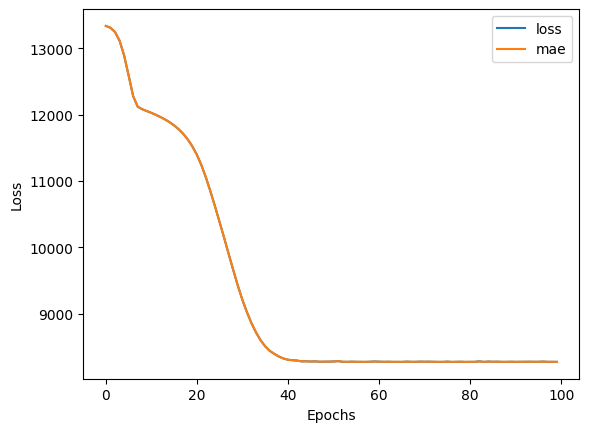

In [62]:
tf.random.set_seed(42)

# step 1: create the model
insuranceModel_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(200), 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
])

# step 2: compile the model
insuranceModel_2.compile(loss = tf.keras.losses.mae, 
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics = ["mae"])

# step 3: fit the model
history = insuranceModel_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose=1)

pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")


In [61]:
insuranceModel_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8628.4688 - mae: 8628.4688


[8628.46875, 8628.46875]

In [57]:
insuranceModel.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 10419.7959 - mae: 10419.7959


[10419.7958984375, 10419.7958984375]